In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [2]:
def visualize(x_array, log_color_scale = False):
    x_array = np.array(x_array)

    if log_color_scale:
        plt.scatter(x_array[:,0], x_array[:,1], s = 50,\
                    c = np.log(np.arange(1, len(x_array)+1, 1)),\
                    cmap = 'viridis_r')
    else:
        plt.scatter(x_array[:,0], x_array[:,1], s = 50, c = np.arange(len(x_array)),\
                cmap = 'viridis_r')
    plt.plot(x_array[:,0],x_array[:,1], zorder=2) 
    plt.xlabel('x_k[0]')
    plt.ylabel('x_k[1]')
    cbar = plt.colorbar()
    cbar.set_label("Iteration number")
    plt.show()
    
def visualize_comparison(x_grad, x_newton):
    x_grad = np.array(x_grad)
    x_newton = np.array(x_newton)
        
    plt.scatter(x_grad[:,0], x_grad[:,1], s = 5)
    plt.plot(x_grad[:,0],x_grad[:,1], 'o-', zorder=2,  label = 'Gradient Descent')    
    plt.scatter(x_newton[:,0], x_newton[:,1], s = 5)
    plt.plot(x_newton[:,0],x_newton[:,1], 'o-', zorder=2,  label = "Newton's method") 
    plt.xlabel('x_k[0]')
    plt.ylabel('x_k[1]')
    plt.legend()
    plt.show()


#Optimization algorithms
#Gradient descent (first order method)
def gradient_descent(gradient,x, stepsize, eps = 1e-6, max_iters = 100):
    x_array = [x]
    num_iters =1
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize*gradient(x)
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps: #We stop if the change in x is below a certain threshold
            break
        num_iters += 1
        prev_x = x
    
    return x_array, num_iters

#Netwon's method (second order method)
def Newton(gradient,Hessian, x,  stepsize=1.0, eps = 1e-6, max_iters = 100):
    x_array = [x]
    num_iters =1
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize* np.matmul(np.linalg.inv(Hessian(x)),gradient(x))
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps:  #We stop if the change in x is below a certain threshold
            num_iters -= 1
            break
        num_iters += 1
        prev_x = x
    
    return x_array, num_iters


# Minimizing a quadratic
Consider the following unconstrained convex optimization problem,
\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (32x_1^2 + x_2^2 \right)
\end{aligned}

Clearly, the optimal value of the problem is $0$ and $x_1^* = x_2^*= 0$.

## Using gradient descent

### Part a) Write the update equation to get $x_{k+1}$ from $x_{k}$. Assume that the stepsize used is $\eta$.

Solution:
We have $x_{k+1} = x_k - \eta \nabla f(x_k)$.
In our case we have $\nabla  f(x_k) = [32 x_k[0], x_k[1]]^\top$, where $x_{k}[0]$ and $x_{k}[1]$ denote the first and the second component of the vector $x$ respectively.

In [3]:
def gradient(x):
    '''Return gradient at x'''
    grad  = np.array([32*x[0], x[1]]).astype('float')
    return grad

def f(x):
    '''Return f(x)'''
    fx = 16*x[0]**2 + 0.5*x[1]**2
    return fx

### Gradient descent in action
Suppose you start with $x_0 = [0.1,1]$. 

### Part b) Run gradient descent for the following stepsizes and compare the paths traced by $x_k$:
1. $\eta = \frac{2}{31.9}$
2. $\eta = \frac{2}{35}$
3. $\eta = \frac{2}{128}$

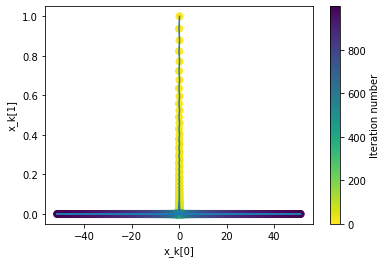

Stepsize = 0.06269592476489029, Num iterations 1000, Final x: [-5.14795804e+01  8.10260676e-29], Final objective value: 42402.3552


In [4]:
eta =2/31.9
x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))


First note that we can write the objective as $\frac{1}{2}x^\top Q x$ where $Q = \begin{bmatrix}32 & 0 \\0 & 1 \end{bmatrix}$, according to the standard form of a convex QP. Note that the largest eigenvalue of $Q$ is given by $\lambda_{max}(Q) = 32$. 
Here the stepsize is larger than the maximum stepsize for convergence $\left(\frac{2}{\lambda_{max}(Q)}\right)$ and thus the algorithm diverges. 

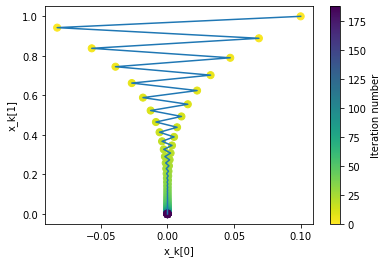

Stepsize = 0.05714285714285714, Num iterations 188, Final x: [4.42620238e-17 1.56974229e-05], Final objective value: 0.0


In [5]:
eta = 2/35
x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Here the stepsize is not too large and thus the algorithm converges (in around 200 iterations). We can see that the $x_k[0]$ quickly converges to 0 but convergence in $x_k[1]$ is slow. 

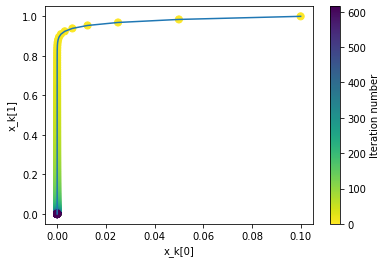

Stepsize = 0.015625, Num iterations 615, Final x: [7.35449178e-187 6.21947768e-005], Final objective value: 0.0


In [6]:
eta= 2/128
x0 = np.array([0.1,1])
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=1000)
x_grad = x_array
visualize(x_array)

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Here the stepsize is even smaller and thus the algorithm converges in around 600 iterations. Again we can see that the $x_k[0]$ quickly converges to 0 but convergence in $x_k[1]$ is slow. 

## Using Newton's method
Next we will use Newton's method to see if convergence is faster. 
### Part c) Write the update equation to get $x_{k+1}$ from $x_{k}$. Assume that the stepsize used is $\eta$.
Solution:
We have $x_{k+1} = x_{k} - \eta (\nabla ^2 f(x_k))^{-1} \nabla f(x_k)$.<BR>
Here,
\begin{aligned}
    \nabla  f(x_k) &= [32 x_k[0], x_k[1]]^\top,\\
    \nabla^2 f(x_k) &= \begin{bmatrix}32 & 0 \\ 0  & 1 \end{bmatrix}.
\end{aligned}

In [7]:
def Hessian(x):
    '''Return Hessian at x'''
    H = np.array([[32, 0], [0, 1]]).astype('float')
    return H


### Newton's method in action
Suppose you start with $x_0 = [0.1,1]$. 
### Part d) Run Newton's method for the following stepsizes and compare the paths traced by $x_k$:
1. $\eta = 2.2$
2. $\eta =1$
3. $\eta = 0.5$

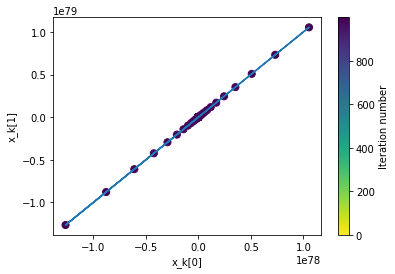

Stepsize = 2.2, Num iterations 1000, Final x: [-1.26492507e+78 -1.26492507e+79], Final objective value: 1.056023392788717e+158


In [8]:
x0 = np.array([0.1,1])
eta = 2.2
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Though we have not covered explicit form for the largest allowed stepsize for Newton's method, we observe that for this problem, the stepsize of 2.2 is too large and the algorithm diverges. 

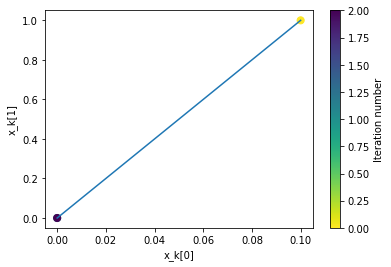

Stepsize = 1.0, Num iterations 1, Final x: [0. 0.], Final objective value: 0.0


In [9]:
x0 = np.array([0.1,1])
eta = 1.0
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Using a stepsize of 1, the algorithm converges in one iteration! Later we will see that this is not always true when the objective is not quadratic. 

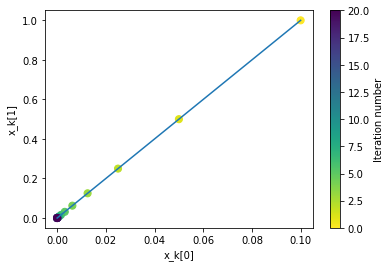

Stepsize = 0.5, Num iterations 19, Final x: [9.53674316e-08 9.53674316e-07], Final objective value: 0.0


In [10]:
x0 = np.array([0.1,1])
eta = 0.5
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
x_newton = x_array

print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Using a stepsize of 0.5, the algorithm coverges in around 20 iterations. 

### Part e) Compare the paths taken by gradient descent with stepsize 2/128 and Newton's method with stepsize 0.5

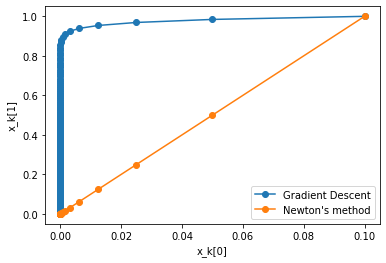

In [11]:
#Solution
visualize_comparison(x_grad, x_newton)

We can see that when using Newton's method, the trajectory follows a straight line joining the initial point to the optimal point but this is not the case when using gradient descent. (This is true since our objective is quadratic but later we will see that for non-quadratic objective functions even Newton method's will not follow a straight line trajectory from initial point to optimal point).

## Minimizing a non-quadratic objective
Next we consider a problem that involves minimization of an objective function that is not quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (10x_1^2 + x_2^2 \right) +  5\log(1 + e^{-x_1 -x_2})
\end{aligned}

We can write the update equations for both gradient descent and Newton's method for this case using the same approach that we used for the previous case. 

In [12]:
def gradient2(x):
    '''Return gradient at x'''
    t = np.exp(x[0] + x[1])
    grad  = np.array([10*x[0] - 5/(1 + t), x[1] - 5/(1 + t)]).astype('float')
    return grad

def Hessian2(x):
    '''Return Hessian at x'''
    t = np.exp(x[0] + x[1])
    H_00 = 5 * (2*t**2 + 5*t + 2)/(t + 1)**2
    H_11 = (t**2 + 7*t + 1)/(t + 1)**2
    H_01 = 5*t/(t + 1)**2
    H_10 = 5*t/(t + 1)**2
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

### Gradient Descent in action
Suppose you start with $x_0 = [-20,-20]$. 

### Part f) Run gradient descent using stepsize of 1/8 and plot the trajectory as well as optimal value 

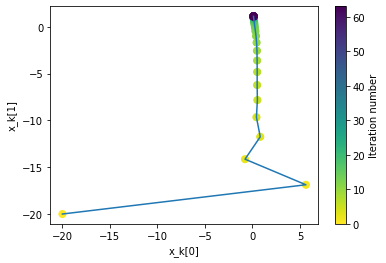

Stepsize = 0.125, Num iterations 63, Final x: [0.11246751 1.12466849], Final objective value: 0.8348


In [13]:
eta= 1/8
x0 = np.array([-20,-20])
x_array, num_iters = gradient_descent(gradient2, x = x0, stepsize=eta, max_iters=1000)
x_grad = x_array
visualize(x_array)
x_grad2 = x_array
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Newton's method in action
Suppose you start with $x_0 = [20,20]$. 

### Part g) Run Newton's method using stepsize of 1 and 1/4 and plot the trajectory as well as optimal value 

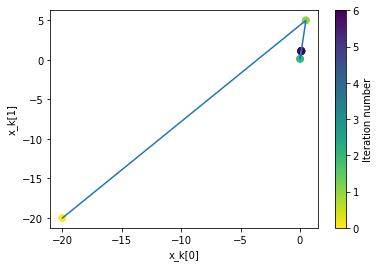

Stepsize = 1.0, Num iterations 5, Final x: [0.11246719 1.12467185], Final objective value: 0.8348


In [14]:
x0 = np.array([-20,-20])
eta = 1.0
x_array, num_iters = Newton(gradient2, Hessian2, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

The algorithm converges in 5 iterations (and not 1 iteration) when using stepsize of 1.0. This is because the objective function is not a quadrratic.

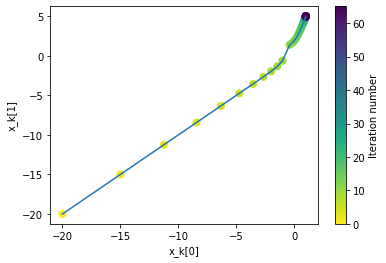

Stepsize = 0.25, Num iterations 64, Final x: [0.99748925 4.98744687], Final objective value: 28.3571


In [15]:
x0 = np.array([-20,-20])
eta = 1.0/4.0
x_array, num_iters = Newton(gradient2, Hessian2, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
x_newton2 = x_array
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Part h) Compare the paths taken by gradient descent with stepsize 1/8 and Newton's method with stepsize 1/4

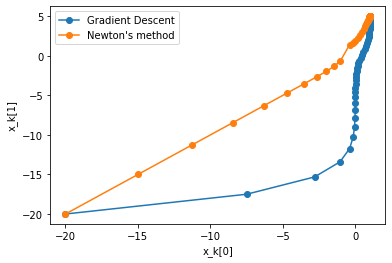

In [16]:
#Solution
visualize_comparison(x_grad2, x_newton2)


Feel free to play around with stepsizes for gradient descent and Newton's method in the cells above and see when things start to diverge and how the paths taken evolve as stepsize changes. 

## Minimizing a bi-quadratic objective
Next we consider a problem that involves minimization of an objective function that is bi-quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) = x_1^4 + x_2^4 
\end{aligned}

We can write the update equations for both gradient descent and Newton's method for this case using the same approach that we used for the previous case. 

In [17]:
def gradient4(x):
    '''Return gradient at x'''
    x1 = x[0]
    x2 = x[1]
    grad  = np.array([4*(x1**3)  ,\
                      4*(x2**3)]).astype('float')
    return grad



def Hessian4(x):
    '''Return Hessian at x'''
    x1 = x[0]
    x2 = x[1]
    H_00 = 12*(x1**2)
    H_11 = 12*(x2**2)
    H_01 = 0
    H_10 = 0
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

### Gradient Descent in action
Suppose you start with $x_0 = [10,20]$. 

### Part i) Run gradient descent using stepsize of 1/1000 and plot the trajectory as well as optimal value 

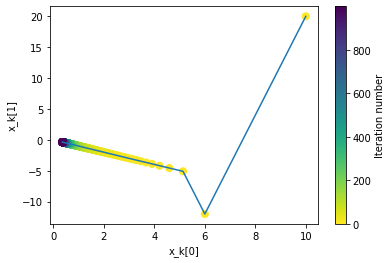

Stepsize = 0.001, Num iterations 1000, Final x: [ 0.35252698 -0.35251398], Final objective value: 2.0505


In [18]:
eta= 1/1000
x0 = np.array([10,20])
x_array, num_iters = gradient_descent(gradient4, x = x0, stepsize=eta, max_iters=1000)
x_grad = x_array
visualize(x_array)
x_grad4 = x_array
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

Try varying the step size. What happens when you increase step size by a factor of 10, or decrease it by a factor of 10?

### Newton's method in action
Suppose you start with $x_0 = [10,20]$. 

### Part j) Run Newton's method using stepsize of 1 and 1/4 and plot the trajectory as well as optimal value 

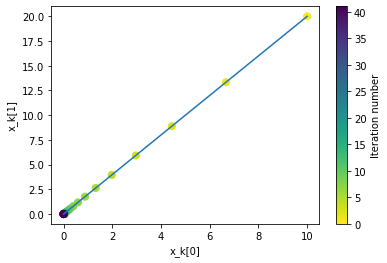

Stepsize = 1, Num iterations 40, Final x: [6.02918179e-07 1.20583636e-06], Final objective value: 0.0


In [19]:
x0 = np.array([10,20])
eta = 1
x_array, num_iters = Newton(gradient4, Hessian4, x = x0, stepsize = eta, max_iters=1000)
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

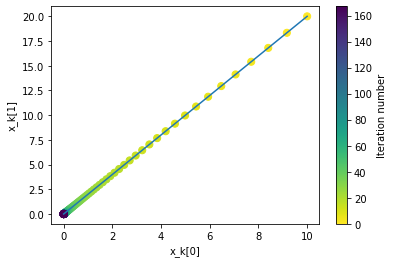

Stepsize = 0.25, Num iterations 166, Final x: [4.89001658e-06 9.78003316e-06], Final objective value: 0.0


In [20]:
x0 = np.array([10,20])
eta = 0.25
x_array, num_iters = Newton(gradient4, Hessian4, x = x0, stepsize = eta, max_iters=1000)
x_newton4 = x_array
visualize(x_array)
print("Stepsize = " + str(eta) + ", Num iterations " + str(num_iters) +  ", Final x: " +  str(x_array[-1]) + ", Final objective value: " + str(f(x_array[-1]).round(4)))

### Part k) Compare the paths taken by gradient descent with stepsize 1/1000 and Newton's method with stepsize 1/4

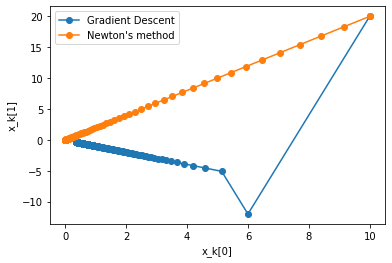

In [21]:
#Solution
visualize_comparison(x_grad4, x_newton4)



## Credit: Designed by Vignesh Subramanian
